In [35]:
import pandas as pd 
import os 

In [36]:
df= pd.read_csv("Sales_Data/Sales_April_2019.csv")
df.head

<bound method NDFrame.head of       Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
18378   194090                Google Phone                1        600   
18379   194091       AA Batteries (4-pack)                1       3.84   
18380   194092      AAA Batteries (4-pack)                2       2.99   
18381   194093       AA Batteries (4-pack)                1       3.84   
18382   194094    Lightning Charging Cable                1      14.95   

           Order Date                        Purchase Address  
0      04/19/19 0

concatnate all data into one file 

In [37]:
files = [file for file in os.listdir("D:\work and education\programming\python project/Sales_Data")] 
all_month_data =pd.DataFrame()
for file in files :
    df = pd.read_csv("D:\work and education\programming\python project/Sales_Data/"+file)
all_month_data = pd.concat([all_month_data,df])
all_month_data.to_csv("all_data.csv", index= False)
    

In [38]:
all_data = pd.read_csv("all_data.csv")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [39]:
all_data = all_data.dropna(how="all")
nan_df = all_data[all_data.isna().any(axis=1)]

In [40]:


all_data= all_data[all_data['Order Date'].str[0:2]!='Or']

In [41]:
all_data['month']=all_data['Order Date'].str[0:2]
all_data['month']=all_data['month'].astype('int32')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9


In [42]:

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.tail(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
11585,259266,USB-C Charging Cable,1,11.95,09/13/19 05:36,"9 2nd St, New York City, NY 10001",9,11.95
11586,259267,AAA Batteries (4-pack),1,2.99,09/21/19 16:47,"824 Park St, San Francisco, CA 94016",9,2.99
11587,259268,AAA Batteries (4-pack),1,2.99,09/26/19 19:28,"646 Walnut St, New York City, NY 10001",9,2.99
11588,259269,27in FHD Monitor,1,149.99,09/21/19 21:43,"976 Main St, Atlanta, GA 30301",9,149.99
11589,259270,Google Phone,1,600.00,09/06/19 15:27,"940 10th St, San Francisco, CA 94016",9,600.00
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


what is the best month for sale and  how much earn that month 

In [43]:
result= all_data.groupby('Order ID').sum()
print (result)

          Quantity Ordered  Price Each  month   sales
Order ID                                             
248151                   4        3.84      9   15.36
248152                   2       11.95      9   23.90
248153                   1       11.95      9   11.95
248154                   1      149.99      9  149.99
248155                   1       11.95      9   11.95
...                    ...         ...    ...     ...
259353                   3        2.99      9    8.97
259354                   1      700.00      9  700.00
259355                   1      700.00      9  700.00
259356                   1      379.99      9  379.99
259357                   1       11.95      9   11.95

[11207 rows x 4 columns]


what is the best city in sales 

first creat new column call city from  'Purchase Address' column in data bwlow the code for that 

In [44]:
def get_city (address):
    return address.split (',')[1]


def get_state(address):
    return address.split(',') [2].split(' ') [1]

all_data['city'] = all_data['Purchase Address'].apply(lambda x:get_city (x)+ ' '+ get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles CA
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,Austin TX
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles CA
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle WA
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta GA


code below to andentify what the best city in sales

In [45]:
result= all_data.groupby('city').sum()
print (result)

                   Quantity Ordered  Price Each  month      sales
city                                                             
 Atlanta GA                    1035   169923.85   8235  171278.89
 Austin TX                      766   105952.81   5997  106610.59
 Boston MA                     1455   245551.73  11548  247368.73
 Dallas TX                     1054   163079.02   8416  164215.85
 Los Angeles CA                2125   352668.55  16960  354218.42
 New York City NY              1711   299708.03  13827  301290.77
 Portland ME                    161    28657.04   1305   28759.56
 Portland OR                    668   103537.96   5347  104189.92
 San Francisco CA              3086   461866.01  24613  464529.65
 Seattle WA                    1058   155297.68   8433  156354.32


show the result in graph 

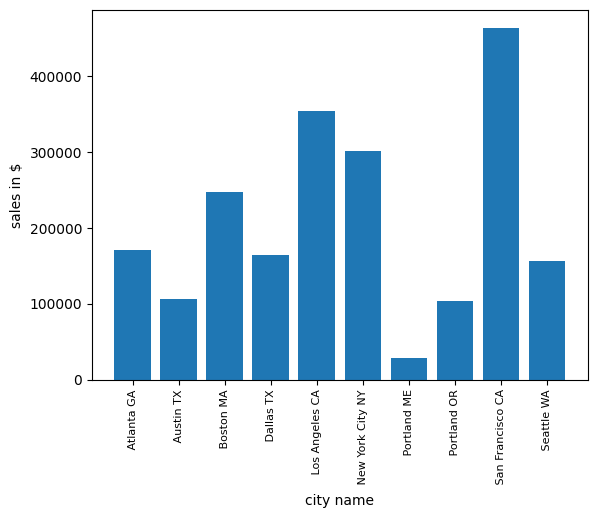

In [46]:

import matplotlib.pyplot as plt
cities= [city for city ,df in all_data.groupby('city')]
plt.bar(cities,result ['sales'])
plt.xticks(cities,rotation ='vertical' , size = 8 )
plt.xlabel('city name')
plt.ylabel('sales in $')
plt.show()


what is the best time to but advertisments to maximize customers buying products ?

In [ ]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['minute'] = all_data['Order Date'].dt.minute
all_data.head()

<function matplotlib.pyplot.show(close=None, block=None)>

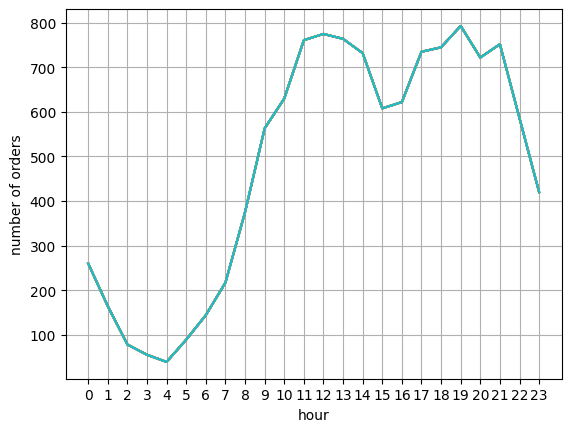

In [48]:
from itertools import count, groupby


hours = [hour for hour , df in  all_data.groupby('Hour')]
plt.plot(hours ,all_data.groupby(['Hour']).count())
plt.xticks (hours)
plt.grid()
plt.xlabel("hour")
plt.ylabel ('number of orders')
plt.show

what products are most often soled together ?

In [49]:
df = all_data[all_data['Order ID'].duplicated(keep=False)] # if the product orderd 2 or more times
df['groubed']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x) )
df= df[['Order ID','groubed']].drop_duplicates()
df.head()

C:\Users\asuss\AppData\Local\Temp\ipykernel_4444\2104753952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['groubed']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x) )


,Order ID,groubed
20,248171,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,"iPhone,Lightning Charging Cable"
70,248219,"Bose SoundSport Headphones,Google Phone"
117,248265,"Vareebadd Phone,Bose SoundSport Headphones"
176,248323,"Google Phone,Bose SoundSport Headphones"


now counting the unique pairs of numbers into a python dictionary 

In [50]:
from itertools import  combinations
from collections import Counter

count= Counter()
for row in df['groubed']:
 row_list =row.split(",")
 count.update(Counter(combinations(row_list,2)))
for key ,value in count.most_common(10):
    print (key,value)



('iPhone', 'Lightning Charging Cable') 61
('Google Phone', 'USB-C Charging Cable') 60
('iPhone', 'Wired Headphones') 27
('Vareebadd Phone', 'USB-C Charging Cable') 22
('iPhone', 'Apple Airpods Headphones') 18
('Google Phone', 'Wired Headphones') 17
('Google Phone', 'Bose SoundSport Headphones') 11
('Lightning Charging Cable', 'Wired Headphones') 8
('Vareebadd Phone', 'Wired Headphones') 6
('USB-C Charging Cable', 'Wired Headphones') 6


what product sold the most and why do you think  sold the most 

([<matplotlib.axis.XTick at 0x1e0ffcd2770>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

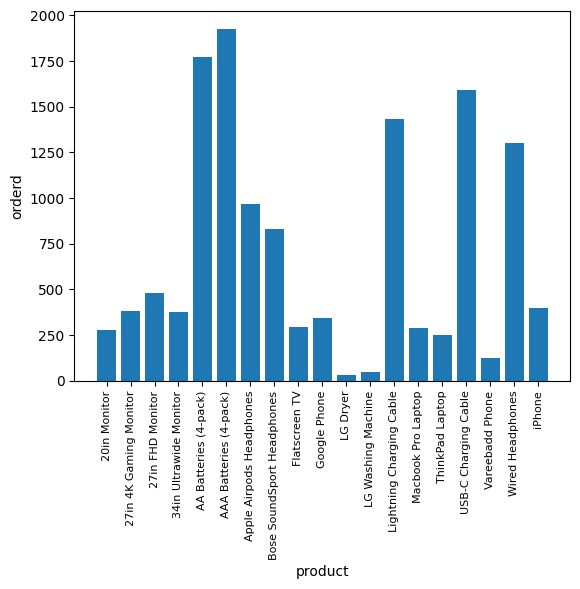

In [51]:

product_groub= all_data.groupby("Product")
quantity_orderd= product_groub.sum()['Quantity Ordered']

products= [product for product ,df in product_groub]

plt.bar(products,quantity_orderd)
plt.ylabel('orderd')
plt.xlabel("product")
plt.xticks(products,rotation ='vertical',size= 8)


to answer why do you think it sold the most 
and the answer is that whenever the price is less the product sold the most as shown in figure.

C:\Users\asuss\AppData\Local\Temp\ipykernel_4444\1990702921.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation = 'vertical',size= 8)


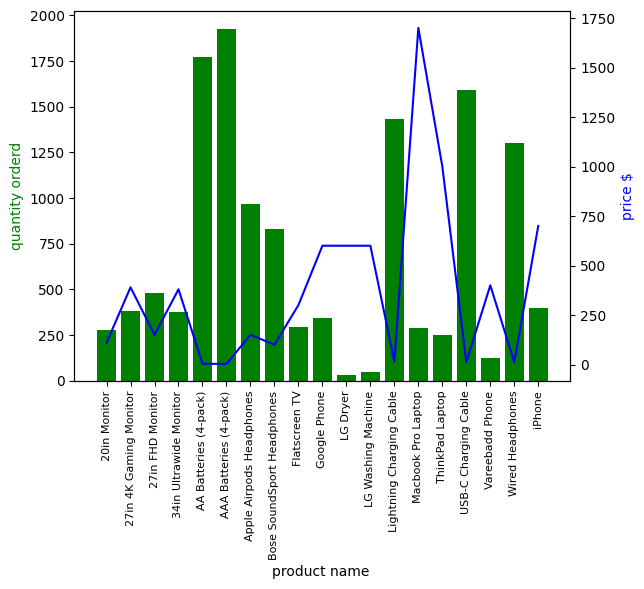

In [52]:

prices = all_data.groupby("Product").mean()['Price Each']


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_orderd,color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('product name ')
ax1.set_ylabel('quantity orderd', color='g')
ax2.set_ylabel('price $', color='b')
ax1.set_xticklabels(products,rotation = 'vertical',size= 8)

plt.show()